In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import pickle
import lzma
import scipy

import matplotlib.ticker as ticker

load_dir = './data/06_10/'
save_dir = "./plots/"
save_fig = 0 #Change to 1 when you want to save figures
fig_ext = '.png'
#fig_ext = '.pdf'

# Analysis at convergence, fixing ($d$, $\rho$, $\lambda$) and varying $\delta$

---

In [2]:
graph="rrg"
d=3
rho="0.100"
delta="0.0100"
lam="0.90"
N=1000

r = r"$\rho$"
l = r"$\lambda$"
dd = r"$\delta$"

In [3]:
data_table = []

file_name = "data_BPEpi_rrg_N10000_d3_deltaMax0.1500_lam1.00_rhoMax0.300_20220610-121319.%f.xz"
with lzma.open(load_dir + file_name, "rb") as f:
    dat0 = pickle.load(f)
data_frame = dat0[0]
data_frame = data_frame.iloc[0:0]

for filename in os.listdir(load_dir):
    path = os.path.join(load_dir, filename)
    if not os.path.isdir(path):
        if not filename.startswith('.'):
            with lzma.open(load_dir + filename, "rb") as f:
                dat = pickle.load(f)
                data_frame = pd.concat([data_frame, dat[0]], ignore_index=True)  

o = r"$\rho$"
s = r"$\delta$"
ov = r"$O_{t=0}$"
mov = r"$MO_{t=0}$"
ov_rnd = r"$O_{t=0,RND}$"
mov_rnd = r"$MO_{t=0,RND}$"
dov = r"$\delta O$"
ovt = r"$\widetilde{O}_{t=0}$"
movt = r"$\widetilde{MO}_{t=0}$"
dovt = r"$\widetilde{\delta O}_{t=0}$"
se_rnd = r"$SE_{RND}$"
mse_rnd = r"$MSE_{RND}$"
dse = r"$\delta SE$"
Rse =  r"$\widetilde{SE}$"
Rmse =  r"$\widetilde{MSE}$"
dRse =  r"$\widetilde{\delta SE}$"
se = "SE"
mse = "MSE"

In [4]:
data_frame.iloc[:, 0:28]

,$N$,$d$,$\lambda$,n_sim,n_iter,$\delta$,$\rho$,init,$O_{t=0}$,$MO_{t=0}$,...,MSE,$SE_{RND}$,$MSE_{RND}$,$\delta SE$,$\widetilde{SE}$,$\widetilde{MSE}$,$\widetilde{\delta SE}$,logLikelihood,# iter,T
0,10000,3,0.9,1,2000,0.005,0.000,rnd,0.9950,0.995000,...,3.516688,3.645574,3.516688,0.128886,-1.827240e-15,0.000000,-1.827240e-15,-4.898175e-08,1.0,10
1,10000,3,0.9,1,2000,0.005,0.000,inf,0.9950,0.995000,...,3.516688,3.645574,3.516688,0.128886,-1.827240e-15,0.000000,-1.827240e-15,-4.898175e-08,22.0,10
2,10000,3,0.9,1,2000,0.005,0.005,rnd,0.9949,0.995127,...,3.186624,3.579745,3.512976,0.029688,1.015248e-01,0.092899,8.625787e-03,-1.151387e+02,356.0,11
3,10000,3,0.9,1,2000,0.005,0.005,inf,0.9949,0.995127,...,3.186624,3.579745,3.512976,0.029688,1.015248e-01,0.092899,8.625787e-03,-1.151387e+02,374.0,11
4,10000,3,0.9,1,2000,0.005,0.025,rnd,0.9974,0.996989,...,1.434283,3.512068,3.462814,-0.238148,6.594217e-01,0.585804,7.361733e-02,-4.330642e+02,2000.0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43995,10000,3,0.8,1,2000,0.150,0.250,inf,0.9081,0.907053,...,0.606029,1.415635,1.426917,-0.027179,5.911021e-01,0.575288,1.581425e-02,-3.446974e+03,57.0,6
43996,10000,3,0.8,1,2000,0.150,0.300,rnd,0.9187,0.920620,...,0.502035,1.409797,1.417687,0.008141,6.381215e-01,0.645878,-7.756079e-03,-3.932460e+03,63.0,6
43997,10000,3,0.8,1,2000,0.150,0.300,inf,0.9187,0.920620,...,0.502035,1.409797,1.417687,0.008141,6.381215e-01,0.645878,-7.756079e-03,-3.932460e+03,66.0,6
43998,10000,3,0.8,1,2000,0.150,0.350,rnd,0.9437,0.939671,...,0.403021,1.512359,1.513094,-0.006744,7.379746e-01,0.733645,4.329883e-03,-4.375455e+03,70.0,6


In [5]:
rdd=r"$\rho / \delta$"
ddr=r"$\delta / \rho$"
data_frame[rdd] = data_frame[r]/data_frame[dd]
data_frame[ddr] = data_frame[dd]/data_frame[r]

In [6]:
RmseR = r"$\overline{MSE}$"
data_frame[RmseR] = (data_frame[Rmse] - data_frame[r])/(1- data_frame[r])

In [7]:
data_frame[data_frame[dd]==0.005]

,$N$,$d$,$\lambda$,n_sim,n_iter,$\delta$,$\rho$,init,$O_{t=0}$,$MO_{t=0}$,...,$\widetilde{SE}$,$\widetilde{MSE}$,$\widetilde{\delta SE}$,logLikelihood,# iter,T,sim,$\rho / \delta$,$\delta / \rho$,$\overline{MSE}$
0,10000,3,0.9,1,2000,0.005,0.000,rnd,0.9950,0.995000,...,-1.827240e-15,0.000000,-1.827240e-15,-4.898175e-08,1.0,10,0,0.0,inf,0.000000
1,10000,3,0.9,1,2000,0.005,0.000,inf,0.9950,0.995000,...,-1.827240e-15,0.000000,-1.827240e-15,-4.898175e-08,22.0,10,0,0.0,inf,0.000000
2,10000,3,0.9,1,2000,0.005,0.005,rnd,0.9949,0.995127,...,1.015248e-01,0.092899,8.625787e-03,-1.151387e+02,356.0,11,0,1.0,1.000000,0.088341
3,10000,3,0.9,1,2000,0.005,0.005,inf,0.9949,0.995127,...,1.015248e-01,0.092899,8.625787e-03,-1.151387e+02,374.0,11,0,1.0,1.000000,0.088341
4,10000,3,0.9,1,2000,0.005,0.025,rnd,0.9974,0.996989,...,6.594217e-01,0.585804,7.361733e-02,-4.330642e+02,2000.0,11,0,5.0,0.200000,0.575184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43577,10000,3,0.8,1,2000,0.005,0.250,inf,0.9994,0.999365,...,9.488263e-01,0.948298,5.282811e-04,-2.450773e+03,55.0,12,0,50.0,0.020000,0.931064
43578,10000,3,0.8,1,2000,0.005,0.300,rnd,0.9994,0.999642,...,9.579917e-01,0.958467,-4.753930e-04,-2.691716e+03,56.0,12,0,60.0,0.016667,0.940667
43579,10000,3,0.8,1,2000,0.005,0.300,inf,0.9994,0.999642,...,9.579917e-01,0.958467,-4.753930e-04,-2.691716e+03,53.0,12,0,60.0,0.016667,0.940667
43580,10000,3,0.8,1,2000,0.005,0.350,rnd,0.9998,0.999945,...,9.657880e-01,0.964952,8.356853e-04,-2.869256e+03,48.0,11,0,70.0,0.014286,0.946081


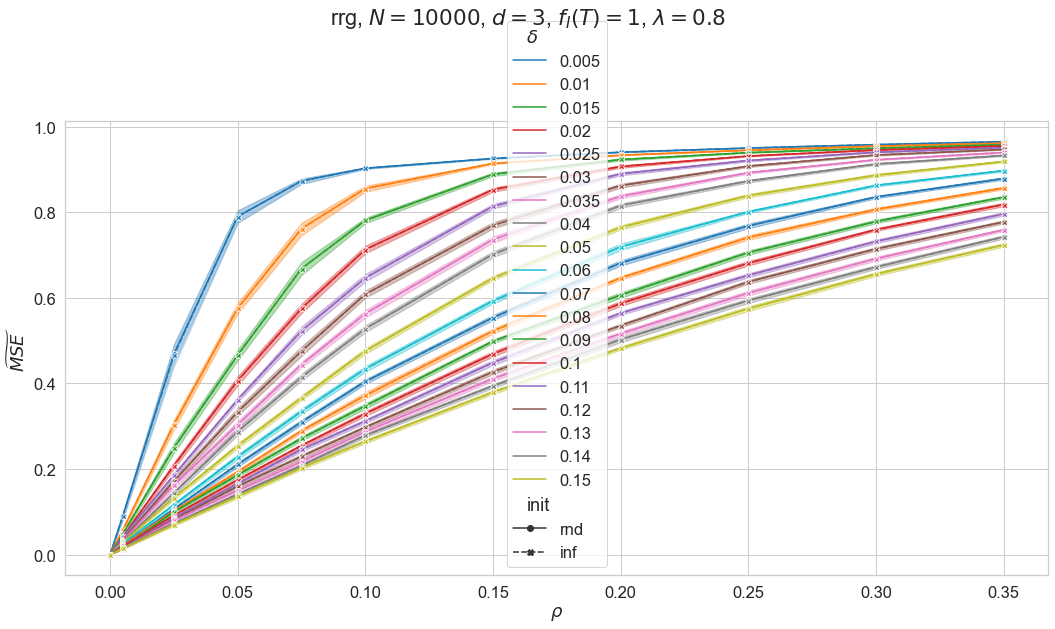

In [13]:
sns.set_theme(style="whitegrid", font_scale=1.5)
fig,ax = plt.subplots(1,1, figsize=(15,9))
plt.suptitle(f"{graph}, $N=10000$, $d={d}$, $f_I(T)=1$, $\lambda=0.8$")
df = data_frame
df.replace([np.inf, -np.inf], np.nan, inplace=True)
#sns.lineplot(data = df[(df[l]==1.0) & (df[r]!=0.005) & (df[rdd].isin([0.200,0.5,1,2,3,4]))], x = dd, y= movt, markers=True, style="init",ax=ax, hue=rdd, palette="tab10")
sns.lineplot(data = df[(df[l]==0.8) & (df[dd]!=0.045)], x = r, y= Rmse, markers=True, style="init",ax=ax, hue=dd, palette="tab10")
#sns.stripplot(data = df[df["init"]=="inf"], x = s, y= mse, hue=r,ax=ax, palette="tab10")
#ax.set_title("$\lambda=0.8$")
#axs[0].set_ylim([-0.05,1.45])
#ax[0][0].set_xlim([-0.0001,20])
#ax[0][1].set_xlim([-0.0001,20])
#ax.set_xlim([1e-3,1e3])
#ax.set_xscale("log")


plt.tight_layout()
#fig.savefig(save_dir + f"sum_{graph}_N{N}_d{d}_lam1_rho_RD.pdf")

### Heatmap

In [14]:
#data_frame[data_frame["# iter"]==2000].iloc[:20,:13]
df = data_frame[data_frame[dd]!=0.001]

In [25]:
yy=RmseR
#yy="# iter"

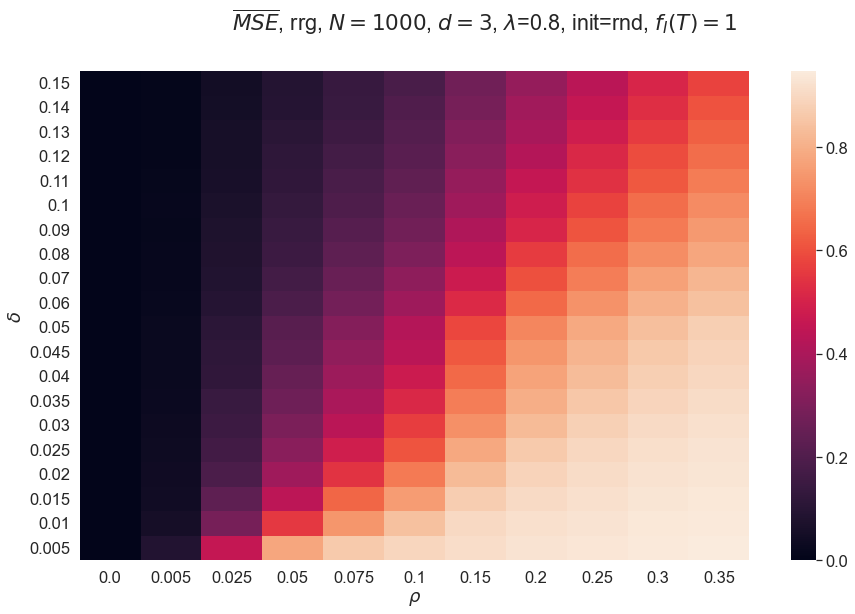

In [26]:
init_tab = ["rnd","inf"]
l_tab = [0.7,0.8,0.9,1]
r_tab = np.sort(df[r].unique())
dd_tab = np.sort(df[dd].unique())

len_i = len(init_tab)
len_l = len(l_tab)
len_r = len(r_tab)
len_d = len(dd_tab)
y_tabb = np.zeros((len_i,len_l,len_r,len_d))
i_tabb = np.zeros((len_i,len_l,len_r,len_d))
l_tabb = np.zeros((len_i,len_l,len_r,len_d))
r_tabb = np.zeros((len_i,len_l,len_r,len_d))
d_tabb = np.zeros((len_i,len_l,len_r,len_d))
for i,init in enumerate(init_tab):
    for j,lam in enumerate(l_tab):
        for k,rho in enumerate(r_tab):
            for ll,delta in enumerate(dd_tab):
                y_tabb[i][j][k][ll] = df[(df["init"]==init) & (df[l]==lam) & (df[r]==rho) & (df[dd]==delta)][yy].mean()
                i_tabb[i][j][k][ll] = 0
                if (init == "inf") : i_tabb[i][j][k][ll] = 1
                l_tabb[i][j][k][ll] = lam
                r_tabb[i][j][k][ll] = rho
                d_tabb[i][j][k][ll] = delta
dff = pd.DataFrame({'init':i_tabb.flatten(),r:r_tabb.flatten(),l:l_tabb.flatten(),dd:d_tabb.flatten(),yy:y_tabb.flatten()})
init_fix = 0 # {0,1} == {rnd,inf}
i_fix = ["rnd", "inf"]
dff_cut7 = dff[(dff['init']==init_fix) & (dff[l]==0.7)].drop('init',axis=1).drop(l,axis=1)
dff_cut8 = dff[(dff['init']==init_fix) & (dff[l]==0.8)].drop('init',axis=1).drop(l,axis=1)
dff_cut9 = dff[(dff['init']==init_fix) & (dff[l]==0.9)].drop('init',axis=1).drop(l,axis=1)
dff_cut1 = dff[(dff['init']==init_fix) & (dff[l]==1.0)].drop('init',axis=1).drop(l,axis=1)
dff_cut = [dff_cut7,dff_cut8,dff_cut9,dff_cut1]
sns.set_theme(style="whitegrid", font_scale=1.5)
fig,ax = plt.subplots(1,1, figsize=(15,9),)
plt.suptitle(yy + f", {graph}, $N={N}$, $d={d}$, " + l + f"={0.8}, init={i_fix[init_fix]}, $f_I(T)=1$")
sns.heatmap(dff_cut8.pivot(dd,r,yy),ax=ax)
ax.invert_yaxis()
#ax[0].set_title("Random initialization")
#ax[1].invert_yaxis()
#ax[1].set_title("Informed initialization")
#plt.tight_layout()
#fig.savefig(save_dir + f"NC_{graph}_N{N}_d{d}_LAM_RHO_ns5.pdf")

In [27]:
x = []
y = []
z = []
x_un = []
y_un = []
z_un = []
for dc in dff_cut:
    x.append(dc[r].values)
    y.append(dc[dd].values)
    z.append(dc[yy].values)
    x_un.append(np.unique(x))
    y_un.append(np.unique(y))
    z_un.append(dc[yy].values.reshape((len(np.unique(x)),-1)))
f = []
for i in range(len(dff_cut)):
    f.append(scipy.interpolate.RectBivariateSpline(np.unique(x[i]), np.unique(y[i]), z[i].reshape((len(np.unique(x)),-1))))
#f = scipy.interpolate.interp2d(x, y, z, kind="quintic")

In [22]:
#x_un

In [23]:
#f[0](0.75,0.13)

/var/folders/w6/zx_nxxqs3gdcq636sf5z6z2m0000gn/T/ipykernel_3715/646507264.py:35: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(surf, cax=cbar_ax)


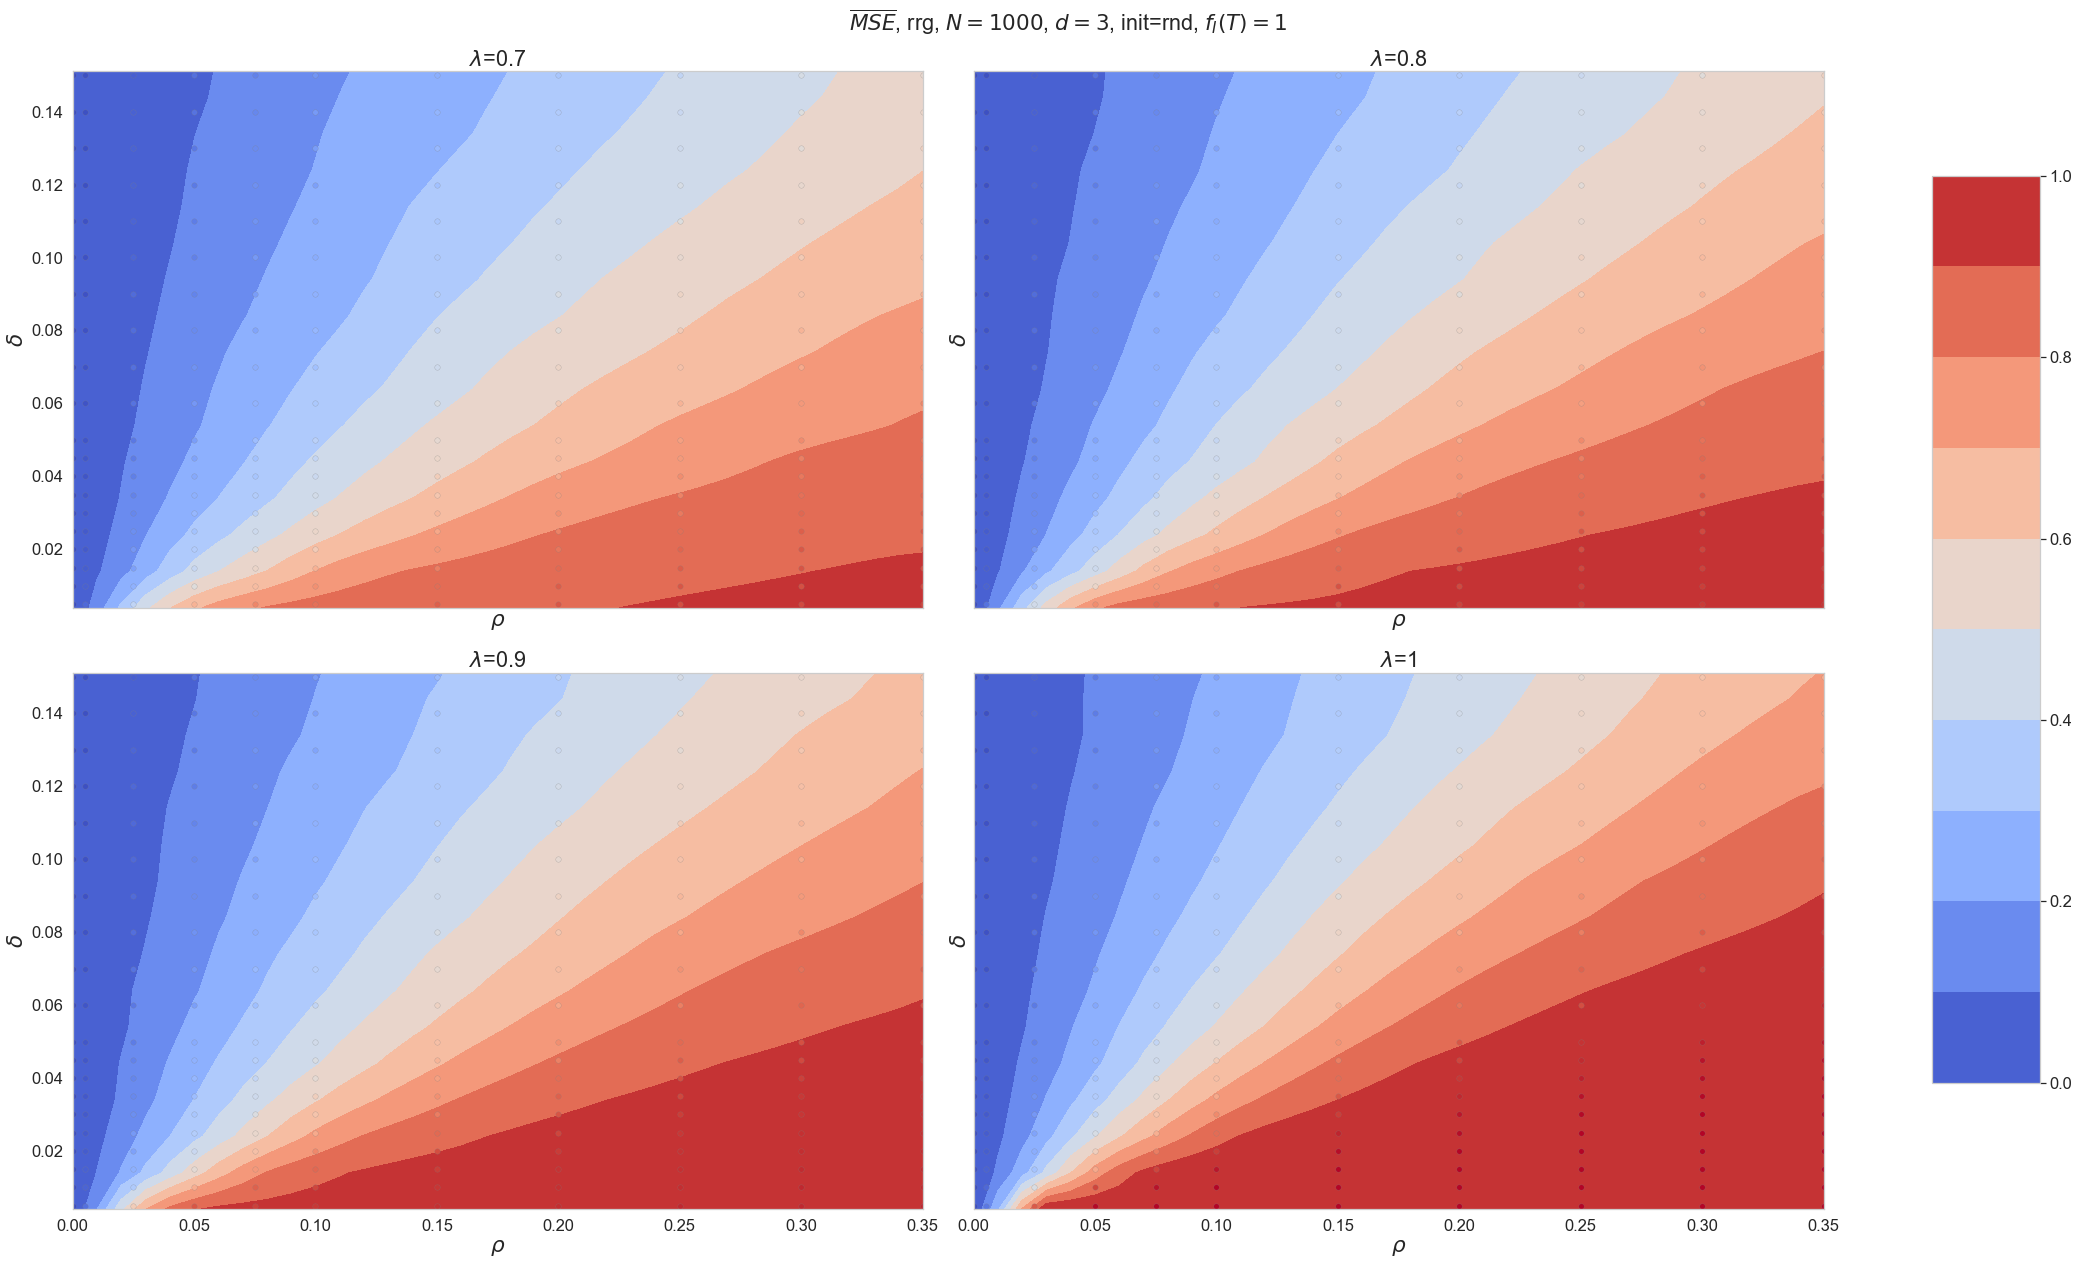

In [30]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np

fig, axs = plt.subplots(2,2, figsize=(30,18), sharex=True, sharey=True)
plt.suptitle(yy + f", {graph}, $N={N}$, $d={d}$,"+ f" init={i_fix[init_fix]}, $f_I(T)=1$", fontsize='large')
levels=10
level_boundaries = np.linspace(0, 1, levels + 1)
for i in range(len(dff_cut)):
    # Make data.
    X1 = np.arange(0, 0.38, 0.01)
    Y1 = np.arange(0.004, 0.16, 0.01)
    X, Y = np.meshgrid(X1, Y1)
    Z = np.array([ np.array([ max(min(f[i](x,y)[0][0],1),0) for x in X1]) for y in Y1])

    # Plot the surface.

    surf = axs[int(i/2)][i%2].contourf(X, Y, Z, cmap=cm.coolwarm, levels=level_boundaries)
    
    for ii, xi in enumerate(x_un[i]):
        for j, yj in enumerate(y_un[i]):
            axs[int(i/2)][i%2].scatter(xi,yj, s=30, color=cm.coolwarm(z_un[i][ii][j]),edgecolors='grey', linewidths=0.2)

    axs[int(i/2)][i%2].set_xlabel(r, fontsize='large')
    axs[int(i/2)][i%2].set_ylabel(dd,  fontsize='large')
    axs[int(i/2)][i%2].set_title(l + f"={l_tab[i]}",  fontsize='large')
    axs[int(i/2)][i%2].set_xlim([-1e-5,0.3501])
    axs[int(i/2)][i%2].set_ylim([0.004,0.151])

# Add a color bar which maps values to colors.
plt.tight_layout()
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.9, 0.15, 0.05, 0.7])
fig.colorbar(surf, cax=cbar_ax)

#fig.savefig(save_dir + f"PhaseDiagRMOVT_{graph}_N{N}_d{d}_RHO_DEL.pdf")